**Описание проекта:** разработать модель для предсказания успешности стартапа (закроется или нет).

## Загрузка данных

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install -U scikit-learn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from dateutil import relativedelta
from collections import defaultdict
import re
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

import phik
from phik.report import plot_correlation_matrix
from phik import phik_matrix

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    OrdinalEncoder,
    MinMaxScaler
)
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression
)
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    mean_absolute_error,
    r2_score,
    mean_squared_error,
    roc_auc_score
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import (
    RandomizedSearchCV,
    GridSearchCV
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif 

In [5]:
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
startups = pd.read_csv('D:/Practicum/Стартап Kaggle/kaggle_startups_train_27042024.csv', sep = ',')

In [7]:
startups.head(10)

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,"828,626.00",operating,CHE,25,Zurich,Zürich,2,2009-12-31,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,"42,935,019.00",operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,"35,456,381.00",operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,"22,250,000.00",operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-09-30,2012-02-01,2012-02-01,NaN
5,Connected Sports Ventures,Mobile,"4,300,000.00",operating,USA,NJ,Newark,Princeton,1,2011-01-20,2012-11-12,2012-11-12,NaN
6,Attensity,Analytics|Business Analytics|Social CRM|Social...,"90,000,000.00",operating,USA,CA,SF Bay Area,Redwood City,1,2000-01-01,2014-05-14,2014-05-14,NaN
7,Mesh Networks,Software,"4,300,000.00",operating,USA,TX,Houston,Houston,1,2005-01-01,2014-11-09,2014-11-09,NaN
8,AngioScore,Biotechnology,"42,000,000.00",operating,USA,CA,SF Bay Area,Fremont,2,2003-01-01,2007-10-09,2011-04-20,NaN
9,Vidatronic,Semiconductors,"1,250,500.00",operating,USA,TX,Austin,College Station,2,2010-01-01,2011-08-23,2013-03-21,NaN


In [8]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52513 non-null  object 
 1   category_list      50049 non-null  object 
 2   funding_total_usd  42445 non-null  float64
 3   status             52514 non-null  object 
 4   country_code       47013 non-null  object 
 5   state_code         45752 non-null  object 
 6   region             46156 non-null  object 
 7   city               46156 non-null  object 
 8   funding_rounds     52514 non-null  int64  
 9   founded_at         52514 non-null  object 
 10  first_funding_at   52514 non-null  object 
 11  last_funding_at    52514 non-null  object 
 12  closed_at          4915 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


In [9]:
startups_test = pd.read_csv('D:/Practicum/Стартап Kaggle/kaggle_startups_test_27042024.csv', sep = ',')

In [10]:
startups_test.head(10)

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,"2,819,200.00",NIC,17,NaN,NaN,1,2008-06-01,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-25,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,"428,257.00",LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-06-16,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,"34,700,000.00",USA,CA,San Diego,San Diego,4,2005-01-01,2005-01-01,2010-04-20,4748
4,DNA13,Software,"4,530,000.00",CAN,ON,Ottawa,Ottawa,1,2001-01-01,2007-05-08,2007-05-08,6209
5,Quickfire Games,Design|Entertainment|Games,"160,000.00",NaN,NaN,NaN,NaN,2,2013-09-01,2013-09-18,2014-09-18,1583
6,Sente Inc.,Biotechnology,"26,842,000.00",USA,CA,San Diego,Encinitas,5,2007-01-01,2009-01-31,2014-06-02,4018
7,Triosyn,Health Care|Medical|Therapeutics,"4,000,000.00",NaN,NaN,NaN,NaN,1,2002-07-22,2003-06-02,2003-06-02,5642
8,Urgent.ly,Software,"8,710,000.00",USA,VA,"Washington, D.C.",Sterling,3,2013-01-01,2014-04-17,2015-09-29,1826
9,Map Decisions,Software,"13,200.00",USA,PA,Allentown,Bethlehem,1,2012-05-15,2013-08-09,2013-08-09,2057


In [11]:
startups_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   founded_at         13125 non-null  object 
 9   first_funding_at   13125 non-null  object 
 10  last_funding_at    13125 non-null  object 
 11  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 1.2+ MB


Данные загружены. Созданы датафреймы для дальнейшей обработки.

## Предобработка данных

**Изменение типов данных**

Для тренировочной таблицы. Приведем к типу datetime данные с датой.

In [12]:
startups['founded_at'] = pd.to_datetime(startups['founded_at'], format = '%Y-%m-%d')

In [13]:
startups['last_funding_at'] = pd.to_datetime(startups['last_funding_at'], format = '%Y-%m-%d')

In [14]:
startups['first_funding_at'] = pd.to_datetime(startups['first_funding_at'], format = '%Y-%m-%d')

In [15]:
startups['closed_at'] = pd.to_datetime(startups['closed_at'], format = '%Y-%m-%d')

In [16]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52513 non-null  object        
 1   category_list      50049 non-null  object        
 2   funding_total_usd  42445 non-null  float64       
 3   status             52514 non-null  object        
 4   country_code       47013 non-null  object        
 5   state_code         45752 non-null  object        
 6   region             46156 non-null  object        
 7   city               46156 non-null  object        
 8   funding_rounds     52514 non-null  int64         
 9   founded_at         52514 non-null  datetime64[ns]
 10  first_funding_at   52514 non-null  datetime64[ns]
 11  last_funding_at    52514 non-null  datetime64[ns]
 12  closed_at          4915 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

Для тестовых данных. Приведем к типу datetime данные с датой.

In [17]:
startups_test['founded_at'] = pd.to_datetime(startups_test['founded_at'], format = '%Y-%m-%d')

In [18]:
startups_test['last_funding_at'] = pd.to_datetime(startups_test['last_funding_at'], format = '%Y-%m-%d')

In [19]:
startups_test['first_funding_at'] = pd.to_datetime(startups_test['first_funding_at'], format = '%Y-%m-%d')

In [20]:
startups_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               13125 non-null  object        
 1   category_list      12534 non-null  object        
 2   funding_total_usd  10547 non-null  float64       
 3   country_code       11743 non-null  object        
 4   state_code         11430 non-null  object        
 5   region             11536 non-null  object        
 6   city               11538 non-null  object        
 7   funding_rounds     13125 non-null  int64         
 8   founded_at         13125 non-null  datetime64[ns]
 9   first_funding_at   13125 non-null  datetime64[ns]
 10  last_funding_at    13125 non-null  datetime64[ns]
 11  lifetime           13125 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(6)
memory usage: 1.2+ MB


**Добавление столбца lifetime в тренировочную таблицу**

Тренировочные и тестовые таблицы должны совпадать по набору столбцов. Создадим столбец lifetime для тренировочных данных как разницу между датой закрытия и датой создания стартапа. Затем удалим столбец с датой закрытия из тренировочной таблицы.

В условии сказано, что это данные о стартапах, функционировавших в период с 1970 по 2018 годы. Поэтому если дата закрытия не указана, подставим последний день 2018 года. Таким образом, lifetime в тренировочной таблице будет лучше сопоставим с тестовой выборкой.

In [21]:
closed_date = datetime.date(2018,12,31)

In [22]:
startups['closed_at'] = startups['closed_at'].fillna(closed_date)

In [23]:
startups['closed_at'] = pd.to_datetime(startups['closed_at'], format = '%Y-%m-%d')

In [24]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52513 non-null  object        
 1   category_list      50049 non-null  object        
 2   funding_total_usd  42445 non-null  float64       
 3   status             52514 non-null  object        
 4   country_code       47013 non-null  object        
 5   state_code         45752 non-null  object        
 6   region             46156 non-null  object        
 7   city               46156 non-null  object        
 8   funding_rounds     52514 non-null  int64         
 9   founded_at         52514 non-null  datetime64[ns]
 10  first_funding_at   52514 non-null  datetime64[ns]
 11  last_funding_at    52514 non-null  datetime64[ns]
 12  closed_at          52514 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

In [25]:
startups['closed_at'].value_counts()

closed_at
2018-12-31    47599
2017-01-22        8
2013-06-09        7
2012-12-26        6
2015-08-31        6
2016-08-18        6
2016-09-19        6
2009-02-01        6
2013-08-23        6
2013-07-04        6
2014-09-18        5
2013-10-04        5
2017-05-15        5
2010-08-10        5
2013-07-16        5
2016-09-15        5
2016-12-24        5
2013-03-09        5
2016-08-02        5
2016-12-19        5
2013-02-26        5
2009-09-11        5
2012-02-09        5
2014-04-15        5
2013-09-25        5
2016-03-05        5
2015-07-13        5
2016-12-21        5
2017-02-20        4
2013-06-20        4
2008-10-20        4
2013-04-03        4
2016-11-19        4
2016-09-26        4
2016-05-25        4
2015-08-28        4
2008-01-30        4
2014-06-21        4
2016-08-30        4
2017-02-25        4
2013-07-14        4
2016-02-06        4
2009-08-30        4
2013-05-01        4
2011-09-14        4
2017-02-11        4
2017-01-08        4
2014-08-31        4
2013-04-07        4
2013-09-02

In [26]:
startups.shape

(52514, 13)

In [27]:
startups['lifetime'] = (startups['closed_at'] - startups['founded_at']).dt.days

In [28]:
startups.sample(5)

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,lifetime
24298,Base CRM,CRM|Software,"52,900,000.00",operating,USA,CA,SF Bay Area,Mountain View,4,2009-01-01,2011-02-25,2015-09-29,2018-12-31,3651
27524,Bama Leasing,Automotive|Cars|Financial Services,"3,343,000.00",operating,USA,PA,Scranton,Montoursville,1,2015-01-01,2015-05-19,2015-05-19,2018-12-31,1460
1162,DwellAware,Big Data Analytics|Business Analytics|Finance ...,"2,181,000.00",operating,USA,CA,SF Bay Area,San Francisco,2,2013-10-16,2013-12-15,2014-03-23,2018-12-31,1902
6700,Employment.com,NaN,NaN,operating,NaN,NaN,NaN,NaN,1,1998-02-08,1999-12-13,1999-12-13,2018-12-31,7631
33922,51 Auto,Automotive,"4,500,000.00",closed,NaN,NaN,NaN,NaN,1,2007-02-02,2008-06-01,2008-06-01,2009-12-16,1048


In [29]:
startups.shape

(52514, 14)

In [30]:
startups = startups.drop('closed_at', axis=1)

In [31]:
startups.shape

(52514, 13)

**Поиск дубликатов**

In [32]:
startups.duplicated().sum()

0

**Изучение данных в тренировочной таблице по каждому столбцу и по возможности приведение в более удобный вид, по возможности замена пропусков.**

**Name**

In [33]:
startups[startups['name'].isna() != False]

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,lifetime
3291,NaN,Startups,"25,000.00",closed,USA,OR,"Portland, Oregon",Portland,1,2011-10-01,2012-03-01,2012-03-01,547


Одно наименование в стартапах пропущено, но это не влияет на результативность модели. Заменим пропуск на NoName, как признак того, что он обработан и чтобы он не влиял на результаты расчетных функций.

In [34]:
startups.loc[startups['name'].isna() != False, 'name'] = 'NoNameStartup'

In [35]:
startups['name'].value_counts().sum()

52514

In [36]:
startups['name'].nunique()

52514

Все наименования стартапов уникальны. 

**Сategory_list**

Категорий очень много. Попробуем сократить их количество. Создадим словарь со всеми словами/словосочетаниями, которые встречаются в категориях и посчитаем количество упоминаний. Далее отсортируем словарь по убыванию количества упоминаний. Заменим редкие категории в одну на Other. В цикле пройдемся по словарю и создадим новый столбец с категорией, если слово из словаря встречается в исходной категории.

In [37]:
startups['category_list'].unique()

array(['Online Reservations|Restaurants',
       'Manufacturing|Medical|Medical Devices', 'Biotechnology', ...,
       'Gambling|Games|Online Gaming|Sports',
       'Aerospace|Mobile|Transportation|Travel',
       'Online Rental|Parking|Price Comparison'], dtype=object)

In [38]:
startups['category_list'].isna().sum()

2465

In [39]:
startups['category_list'].fillna('nocategory', inplace= True)

In [40]:
startups['category_list'].isna().sum()

0

In [41]:
startup_category = startups[['name','category_list']]

In [42]:
startup_category['list'] = startup_category['category_list'].str.split(pat='|')

In [43]:
startup_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52514 entries, 0 to 52513
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           52514 non-null  object
 1   category_list  52514 non-null  object
 2   list           52514 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [44]:
startup_category.head(10)

,name,category_list,list
0,Lunchgate,Online Reservations|Restaurants,"[Online Reservations, Restaurants]"
1,EarLens,Manufacturing|Medical|Medical Devices,"[Manufacturing, Medical, Medical Devices]"
2,Reviva Pharmaceuticals,Biotechnology,[Biotechnology]
3,Sancilio and Company,Health Care,[Health Care]
4,WireTough Cylinders,Manufacturing,[Manufacturing]
5,Connected Sports Ventures,Mobile,[Mobile]
6,Attensity,Analytics|Business Analytics|Social CRM|Social...,"[Analytics, Business Analytics, Social CRM, So..."
7,Mesh Networks,Software,[Software]
8,AngioScore,Biotechnology,[Biotechnology]
9,Vidatronic,Semiconductors,[Semiconductors]


In [45]:
def cat_list(data):
    temp = defaultdict(int)
    for sub in data['list']:
        for wrd in sub:
            if wrd != np.nan:
                temp[wrd] += 1
    marklist = sorted(temp.items(), key=lambda x: x[1], reverse=True)
    sortdict = dict(marklist)
    return sortdict

In [46]:
sortdict = cat_list(startup_category)

In [47]:
len(sortdict)

855

In [48]:
sortdict_cut = {}
for k, v in sortdict.items():
    if v > 500:
      sortdict_cut[k] = v  

In [49]:
len(sortdict_cut)

52

In [50]:
startups['new_cat'] = 0

In [51]:
def new_cat(sortdict, startups):
    for cat in sortdict.keys():
        for cat_data in startups['category_list'].unique():
            if cat in cat_data:
                startups.loc[(startups['category_list'] == cat_data) & (startups['new_cat'] == 0),['new_cat']] = cat
    return startups

In [52]:
startups = new_cat(sortdict_cut, startups)

In [53]:
len(startups[(startups['new_cat'] == 0)])

4144

In [54]:
startups.loc[startups['new_cat'] == 0, 'new_cat'] = 'other_cat'

In [55]:
len(startups[(startups['new_cat'] == 0)])

0

In [56]:
startups['new_cat'].nunique()

47

Проделаем такое же упражнение с тестовой выборкой.

In [57]:
startups_test['category_list'].isna().sum()

591

In [58]:
startups_test['category_list'].fillna('nocategory', inplace= True)

In [59]:
startups_test['category_list'].isna().sum()

0

In [67]:
startups_test['new_cat'] = 0

In [68]:
startups_test = new_cat(sortdict_cut, startups_test)

In [70]:
len(startups_test[(startups_test['new_cat'] == 0)])

1056

In [71]:
startups_test.loc[startups_test['new_cat'] == 0, 'new_cat'] = 'other_cat'

In [72]:
len(startups_test[(startups_test['new_cat'] == 0)])

0

In [73]:
startups_test['new_cat'].nunique()

47

**Status**

In [74]:
startups['status'].unique()

array(['operating', 'closed'], dtype=object)

In [75]:
startups['status'].isna().sum()

0

**География**

In [76]:
startups.describe(include = 'object')

,name,category_list,status,country_code,state_code,region,city,new_cat
count,52514,52514,52514,47013,45752,46156,46156,52514
unique,52514,22109,2,134,300,1036,4477,47
top,Lunchgate,Software,operating,USA,CA,SF Bay Area,San Francisco,Software
freq,1,3207,47599,29701,10217,6968,2824,10253


Анализируя наличие географических признаков в данных, прихожу к выводу, что в качестве гео привязки можно попробовать взять state_code, т.к. кол-во уникательных значений вполне приемлемо, и contry_code. Если включить еще регион и город - модель становится слишком сложной, эти географические признаки не будем брать для модели.

В тестовых данных также есть пропуски в географических названиях. Поскольку в тестовых данных нельзя удалять строки, то применим один и тот же прием и для тренировочной, и для тестовой выборки: заменим пропуски на значение 'no_region' и 'no_country'.

In [77]:
startups_regions = startups

In [78]:
startups_regions.loc[startups_regions['state_code'].isna(),'state_code'] = 'no_region'

In [79]:
startups_regions.loc[startups_regions['country_code'].isna(),'country_code'] = 'no_country'

In [80]:
startups_regions.isna().sum()

name                     0
category_list            0
funding_total_usd    10069
status                   0
country_code             0
state_code               0
region                6358
city                  6358
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
lifetime                 0
new_cat                  0
dtype: int64

Сделаем такую же замену в тестовых данных.

In [81]:
startups_test.loc[startups_test['state_code'].isna(),'state_code'] = 'no_region'

In [82]:
startups_test.loc[startups_test['country_code'].isna(),'country_code'] = 'no_country'

In [83]:
startups_test.isna().sum()

name                    0
category_list           0
funding_total_usd    2578
country_code            0
state_code              0
region               1589
city                 1587
funding_rounds          0
founded_at              0
first_funding_at        0
last_funding_at         0
lifetime                0
new_cat                 0
dtype: int64

**funding_total_usd**

In [84]:
startups_regions.describe()

,funding_total_usd,funding_rounds,founded_at,first_funding_at,last_funding_at,lifetime
count,"42,445.00","52,514.00",52514,52514,52514,"52,514.00"
mean,"18,248,255.98",1.74,2008-11-04 08:35:44.342460928,2011-07-17 04:55:32.779830016,2012-06-27 16:46:47.936931072,"3,470.98"
min,1.00,1.00,1970-02-05 00:00:00,1977-05-15 00:00:00,1977-05-15 00:00:00,17.00
25%,"336,000.00",1.00,2006-09-28 00:00:00,2009-10-12 00:00:00,2011-02-01 00:00:00,"2,092.00"
50%,"2,000,000.00",1.00,2010-10-01 00:00:00,2012-07-23 00:00:00,2013-08-30 00:00:00,"2,911.00"
75%,"10,000,000.00",2.00,2013-01-01 00:00:00,2014-04-01 00:00:00,2014-11-17 00:00:00,"4,382.00"
max,"30,079,503,000.00",19.00,2016-04-02 00:00:00,2015-12-05 00:00:00,2015-12-07 00:00:00,"17,742.00"
std,"187,121,675.71",1.37,NaN,NaN,NaN,"2,177.94"


Поскольку в тестовых данных удалять строки нельзя и там придется заполнить пустые значения по данному параметру, то в тренировочной выборке тоже не будем удалять данные. Предположим, что правильным будет заполнить сумму финансирования медианным значением по региону в такой же категории. Сделан выбор в пользу медианы, чтобы избежать влияния выбросов в данных.

In [85]:
for region in startups_regions['state_code'].unique():
    for category in startups_regions['new_cat'].unique():
        startups_regions.loc[(startups_regions['state_code'] == region)&(startups_regions['new_cat'] == category)\
        &(startups_regions['funding_total_usd'].isna()),'funding_total_usd'] = \
        startups_regions.loc[(startups_regions['state_code'] == region)&(startups_regions['new_cat'] == category),'funding_total_usd'].median()

In [86]:
startups_regions['funding_total_usd'].isna().sum()

565

Осталось несколько значений с незаполненным финансированием, т.к. в данном регионе по данной категории не оказалось суммы финансирования для определения медианы. Заполним медианным значением региона.

In [87]:
for region in startups_regions['state_code'].unique():
     startups_regions.loc[(startups_regions['state_code'] == region)\
        &(startups_regions['funding_total_usd'].isna()),'funding_total_usd'] = \
        startups_regions.loc[(startups_regions['state_code'] == region),'funding_total_usd'].median()

In [88]:
startups_regions['funding_total_usd'].isna().sum()

11

Опять осталось несколько значений с незаполненным финансированием, т.к. в данном регионе не оказалось суммы финансирования для определения медианы. Заполним медианным значением категории.

In [89]:
for category in startups_regions['new_cat'].unique():
    startups_regions.loc[(startups_regions['new_cat'] == category)\
    &(startups_regions['funding_total_usd'].isna()),'funding_total_usd'] = \
    startups_regions.loc[(startups_regions['new_cat'] == category),'funding_total_usd'].median()

In [90]:
startups_regions['funding_total_usd'].isna().sum()

0

Проделаем такое же упражнение для тестовой выборки. 

In [91]:
startups_test['funding_total_usd'].isna().sum()

2578

In [92]:
for region in startups_test['state_code'].unique():
    for category in startups_test['new_cat'].unique():
        startups_test.loc[(startups_test['state_code'] == region)&(startups_test['new_cat'] == category)\
        &(startups_test['funding_total_usd'].isna()),'funding_total_usd'] = \
        startups_test.loc[(startups_test['state_code'] == region)&(startups_test['new_cat'] == category),'funding_total_usd'].median()

In [93]:
startups_test['funding_total_usd'].isna().sum()

334

In [94]:
for region in startups_test['state_code'].unique():
    startups_test.loc[(startups_test['state_code'] == region)\
        &(startups_test['funding_total_usd'].isna()),'funding_total_usd'] = \
        startups_test.loc[(startups_test['state_code'] == region),'funding_total_usd'].median()

In [95]:
startups_test['funding_total_usd'].isna().sum()

9

In [96]:
for category in startups_test['new_cat'].unique():
    startups_test.loc[(startups_test['new_cat'] == category)\
        &(startups_test['funding_total_usd'].isna()),'funding_total_usd'] = \
        startups_test.loc[(startups_test['new_cat'] == category),'funding_total_usd'].median()

In [97]:
startups_test['funding_total_usd'].isna().sum()

0

**Lifetime**

Поскольку вариаций значений в признаке lifetime очень много, добавим категорию по сроку жизни. Возможно, это поможет модели сделать более точный прогноз.

In [98]:
#startups_regions['lifetime'].describe()

In [99]:
#startups_regions['lifetime_cat'] = pd.cut(startups_regions['lifetime'], bins=10, labels=False)

In [100]:
#startups_regions['lifetime_cat'].describe()

In [101]:
#startups_regions['lifetime_cat'].value_counts()

В дальнейшем отказалась от этого признака, т.к. он не дал видимых результатов.

**funding_rounds**

In [102]:
startups_regions['funding_rounds'].value_counts()

funding_rounds
1     33488
2      9815
3      4450
4      2189
5      1168
6       616
7       341
8       175
9       109
10       63
11       46
12       22
13        9
16        6
15        5
14        5
17        3
18        3
19        1
Name: count, dtype: int64

Кол-во данных, где было более 5 раундов, сильно сокращается. Объединим данные с 5 и более раундами в одну категорию : 5 раундов.

In [103]:
startups_regions['funding_rounds_cat'] = startups_regions['funding_rounds']

In [104]:
startups_regions.loc[startups_regions['funding_rounds'] > 4, 'funding_rounds_cat'] = 5

In [106]:
startups_regions['funding_rounds_cat'].value_counts()

funding_rounds_cat
1    33488
2     9815
3     4450
5     2572
4     2189
Name: count, dtype: int64

 Преобразуем также тестовые данные

In [107]:
startups_test['funding_rounds_cat'] = startups_test['funding_rounds']

In [108]:
startups_test.loc[startups_test['funding_rounds'] > 4, 'funding_rounds_cat'] = 5

In [109]:
startups_test['funding_rounds_cat'].value_counts()

funding_rounds_cat
1    8449
2    2426
3    1111
5     606
4     533
Name: count, dtype: int64

**first_funding_at & last_funding_at**

Для удобства и большей наглядности вместо значений first_funding_a & last_funding_at посчитаем разницу в днях: дата первого финансирования минус дата основания, дата последнего финансирования минус дата первого финансирования.

In [110]:
startups_regions['first_founded'] = (startups_regions['first_funding_at'] - startups_regions['founded_at']).dt.days

In [111]:
startups_regions['last_first'] = (startups_regions['last_funding_at'] - startups_regions['first_funding_at']).dt.days

In [112]:
startups_regions.describe()

,funding_total_usd,funding_rounds,founded_at,first_funding_at,last_funding_at,lifetime,funding_rounds_cat,first_founded,last_first
count,"52,514.00","52,514.00",52514,52514,52514,"52,514.00","52,514.00","52,514.00","52,514.00"
mean,"15,441,037.95",1.74,2008-11-04 08:35:44.342460928,2011-07-17 04:55:32.779830016,2012-06-27 16:46:47.936931072,"3,470.98",1.68,984.85,346.49
min,1.00,1.00,1970-02-05 00:00:00,1977-05-15 00:00:00,1977-05-15 00:00:00,17.00,1.00,"-9,465.00",0.00
25%,"431,846.00",1.00,2006-09-28 00:00:00,2009-10-12 00:00:00,2011-02-01 00:00:00,"2,092.00",1.00,214.25,0.00
50%,"1,800,000.00",1.00,2010-10-01 00:00:00,2012-07-23 00:00:00,2013-08-30 00:00:00,"2,911.00",1.00,479.00,0.00
75%,"7,999,996.75",2.00,2013-01-01 00:00:00,2014-04-01 00:00:00,2014-11-17 00:00:00,"4,382.00",2.00,976.00,427.00
max,"30,079,503,000.00",19.00,2016-04-02 00:00:00,2015-12-05 00:00:00,2015-12-07 00:00:00,"17,742.00",5.00,"16,313.00","10,807.00"
std,"168,402,769.54",1.37,NaN,NaN,NaN,"2,177.94",1.11,"1,650.21",688.62


In [113]:
startups_regions.sample(5)

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,lifetime,new_cat,funding_rounds_cat,first_founded,last_first
45033,ArtStar,Application Platforms|Art|E-Commerce|Ediscovery,"800,000.00",operating,USA,NY,New York City,New York,1,2011-01-01,2015-03-01,2015-03-01,2921,E-Commerce,1,1520,0
45560,Frankly,Mobile,"600,000.00",operating,USA,CA,SF Bay Area,San Francisco,1,2011-04-10,2015-01-06,2015-01-06,2822,Mobile,1,1367,0
49821,Moodwire,Analytics|Big Data|Polling|Social News|Surveys...,"974,509.00",operating,USA,CA,SF Bay Area,Menlo Park,2,2014-01-01,2009-01-01,2014-05-30,1825,Analytics,2,-1826,1975
26221,EnSight Media,Mobile,"1,783,500.00",operating,KOR,11,Seoul,Seoul,1,2007-07-07,2012-03-01,2012-03-01,4195,Mobile,1,1699,0
12779,SpeakPhone,Information Services|Technology|Telecommunicat...,"253,000.00",closed,CZE,88,CZE - Other,Petersburg,2,2011-09-08,2012-07-01,2012-11-01,866,Technology,2,297,123


Добавим такие же признаки в тестовую выборку.

In [114]:
startups_test['first_founded'] = (startups_test['first_funding_at'] - startups_test['founded_at']).dt.days

In [115]:
startups_test['last_first'] = (startups_test['last_funding_at'] - startups_test['first_funding_at']).dt.days

In [116]:
startups_test.sample(5)

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,lifetime,new_cat,funding_rounds_cat,first_founded,last_first
1529,Alminder,Business Services|Events|Mobile,"1,525,000.00",USA,CA,SF Bay Area,Palo Alto,1,2012-04-01,2013-10-22,2013-10-22,2101,Mobile,1,569,0
7884,Wikasa,Education|Startups,"55,100.00",SGP,no_region,Singapore,Singapore,1,2013-08-01,2014-03-28,2014-03-28,1614,Education,1,239,0
1138,MocoSpace,Games,"10,500,000.00",USA,MA,Boston,Boston,3,2005-10-02,2007-08-27,2010-09-23,4474,Games,3,694,1123
3682,Jeeves,Hardware + Software,"494,746.00",IND,19,Bangalore,Bangalore,1,2007-01-01,2012-06-21,2012-06-21,4018,Software,1,1998,0
12702,Green Chef,Food Processing|Health and Wellness|Organic Food,"15,500,000.00",USA,CO,Denver,Boulder,2,2014-09-19,2014-12-01,2015-04-14,1200,Health and Wellness,2,73,134


## Исследовательский анализ данных

**Исследуем наличие выбросов в данных.**

In [117]:
startups_regions = startups_regions.sort_values(by ='funding_total_usd', ascending = False)

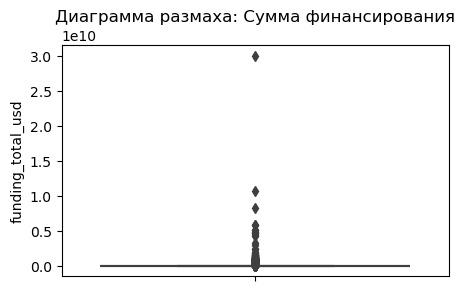

In [118]:
plt.figure(figsize=(5,3))
sns.boxplot(data=startups_regions, y='funding_total_usd')
plt.title('Диаграмма размаха: Сумма финансирования');

На графике видно, что есть выброс. Избавимся от него. Исключим суммы финансирования свыше 20,000,000,000.

In [119]:
startups_regions.shape

(52514, 17)

In [120]:
startups_regions = startups_regions[startups_regions['funding_total_usd']<20000000000]

In [121]:
startups_regions.shape

(52513, 17)

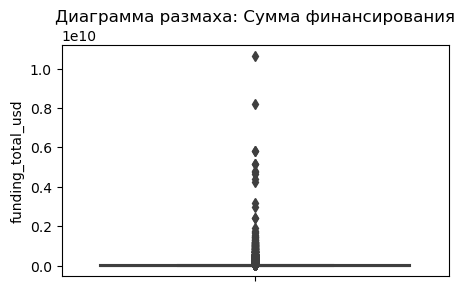

In [122]:
plt.figure(figsize=(5,3))
sns.boxplot(data=startups_regions, y='funding_total_usd')
plt.title('Диаграмма размаха: Сумма финансирования');

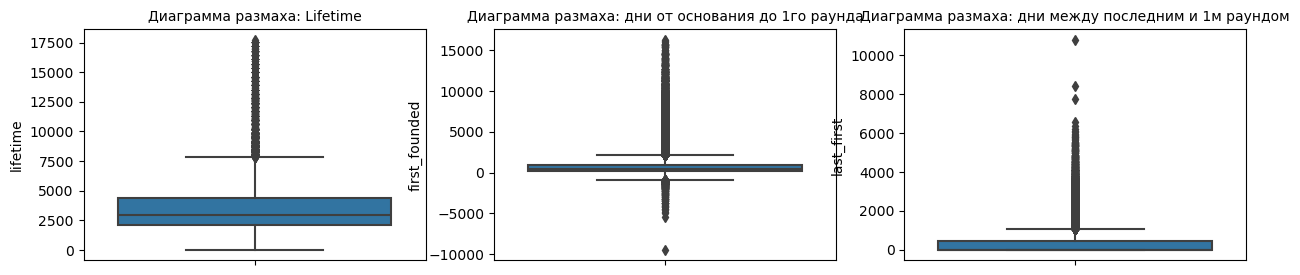

In [123]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.boxplot(data=startups_regions, y='lifetime')
plt.title('Диаграмма размаха: Lifetime', fontsize= 10)
plt.subplot(1,3,2)
sns.boxplot(data=startups_regions, y='first_founded')
plt.title('Диаграмма размаха: дни от основания до 1го раунда', fontsize= 10)
plt.subplot(1,3,3)
sns.boxplot(data=startups_regions, y='last_first')
plt.title('Диаграмма размаха: дни между последним и 1м раундом', fontsize= 10);

**Исследуем финансирование стартапов.**

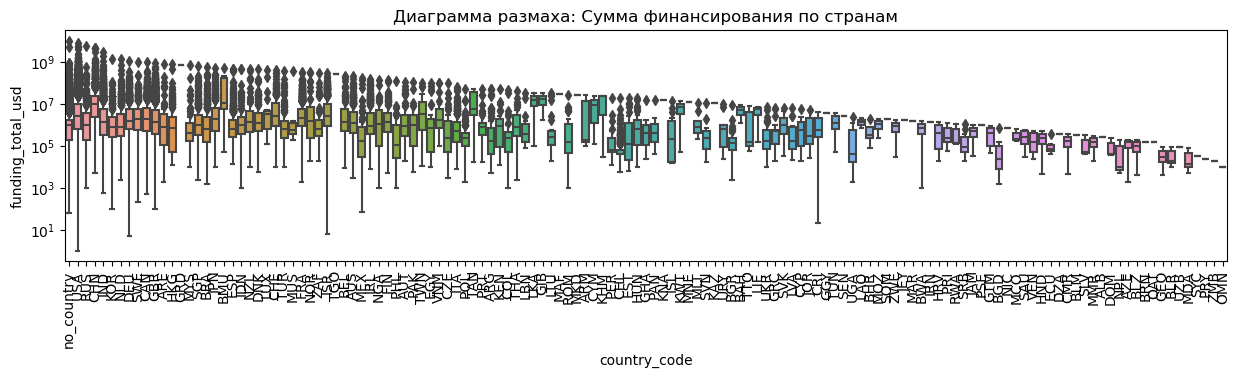

In [124]:
plt.figure(figsize=(15,3))
sns.boxplot(data=startups_regions, y='funding_total_usd', x='country_code')
plt.title('Диаграмма размаха: Сумма финансирования по странам')
plt.xticks(rotation=90)
plt.yscale('log')
plt.rc('xtick', labelsize=8)
plt.show();

In [125]:
data = startups_regions.pivot_table(index=['country_code','status'], values='funding_total_usd', aggfunc='sum')\
        .sort_values(by=['funding_total_usd'], ascending=False).reset_index()
data

,country_code,status,funding_total_usd
0,USA,operating,"473,205,911,768.26"
1,CHN,operating,"70,176,565,612.27"
2,no_country,operating,"42,167,233,075.54"
3,USA,closed,"27,549,361,968.45"
4,GBR,operating,"24,484,875,719.56"
5,IND,operating,"21,457,411,585.60"
6,CAN,operating,"13,733,253,980.35"
7,RUS,operating,"9,011,426,030.08"
8,no_country,closed,"8,945,513,429.86"
9,DEU,operating,"8,598,382,932.34"


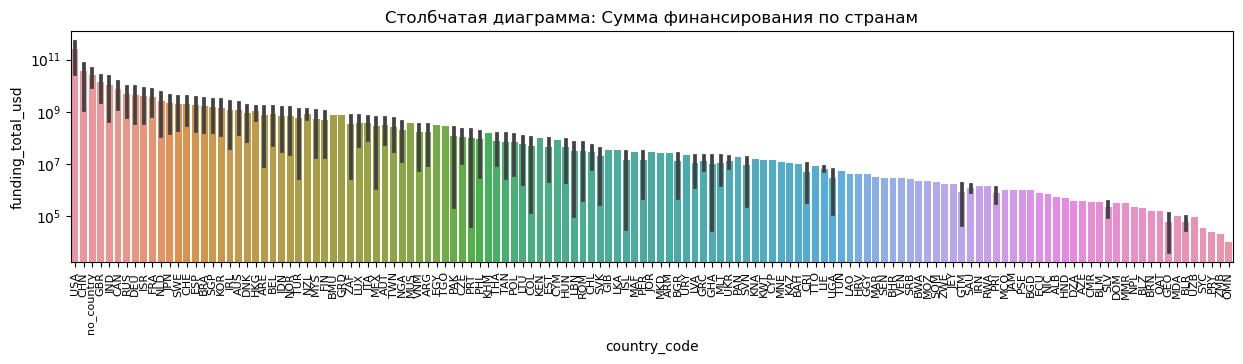

In [126]:
plt.figure(figsize=(15,3))
sns.barplot(data=data, x='country_code', y='funding_total_usd')#, hue='status')
plt.title('Столбчатая диаграмма: Сумма финансирования по странам')
plt.xticks(rotation=90)
plt.yscale('log')
plt.rc('xtick', labelsize=8)
plt.show()

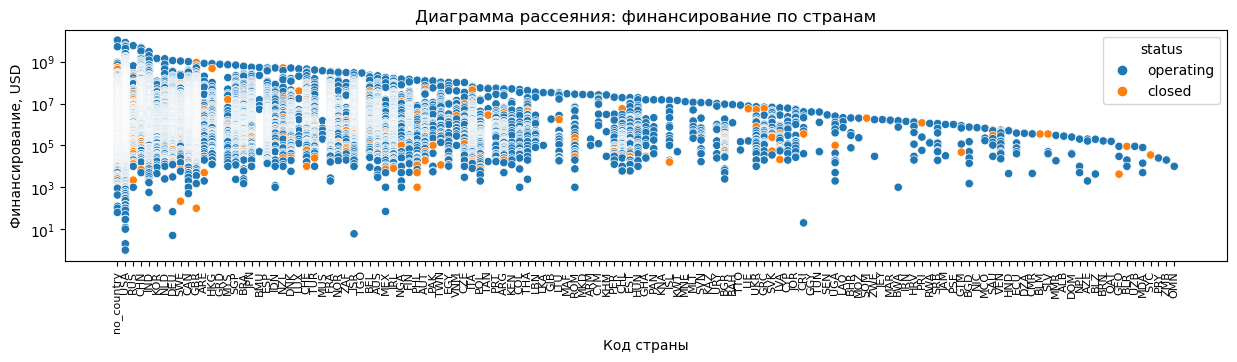

In [127]:
plt.figure(figsize=(15,3))
sns.scatterplot(data=startups_regions, x='country_code', y='funding_total_usd', hue='status')
plt.xticks(rotation=90)
plt.title('Диаграмма рассеяния: финансирование по странам')
plt.ylabel('Финансирование, USD')
plt.xlabel('Код страны')
plt.yscale('log')
plt.rc('xtick', labelsize=10)
plt.show()

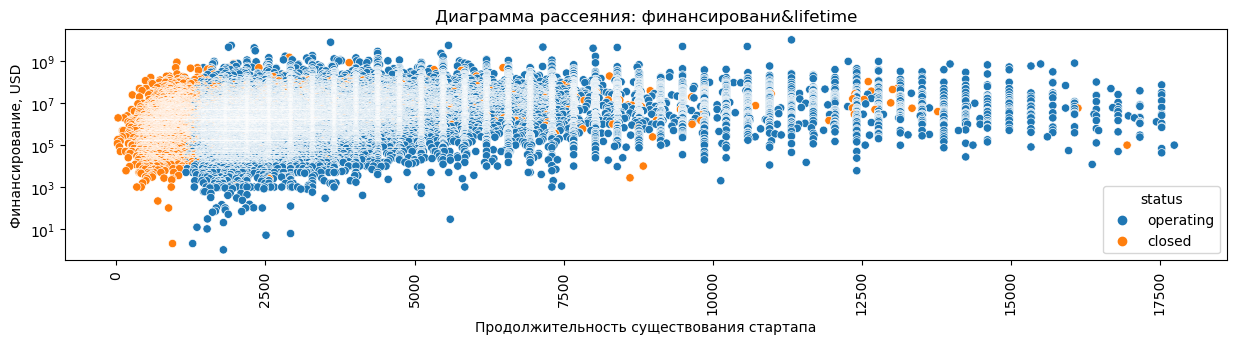

In [128]:
plt.figure(figsize=(15,3))
sns.scatterplot(data=startups_regions, x='lifetime', y='funding_total_usd', hue='status')
plt.xticks(rotation=90)
plt.title('Диаграмма рассеяния: финансировани&lifetime')
plt.ylabel('Финансирование, USD')
plt.xlabel('Продолжительность существования стартапа')
plt.yscale('log')
plt.rc('xtick', labelsize=10)
plt.show()

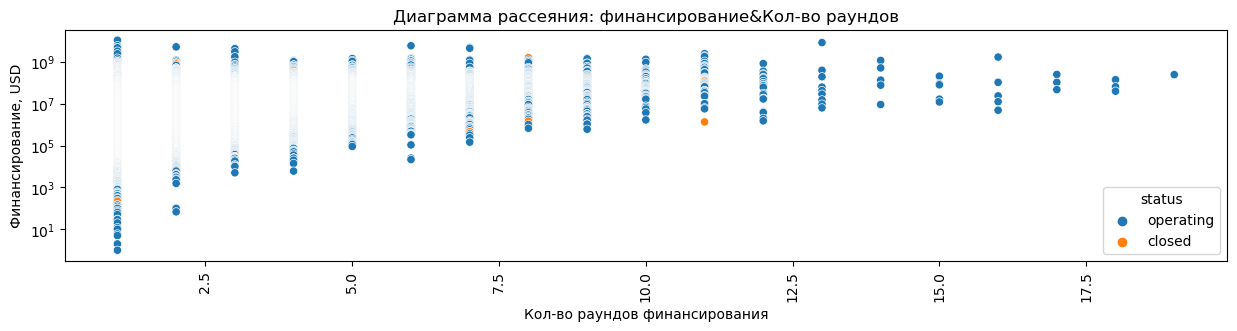

In [129]:
plt.figure(figsize=(15,3))
sns.scatterplot(data=startups_regions, x='funding_rounds', y='funding_total_usd', hue='status')
plt.xticks(rotation=90)
plt.title('Диаграмма рассеяния: финансирование&Кол-во раундов')
plt.ylabel('Финансирование, USD')
plt.xlabel('Кол-во раундов финансирования')
plt.yscale('log')
plt.rc('xtick', labelsize=10)
plt.show()

**Изучение прочих признаков**

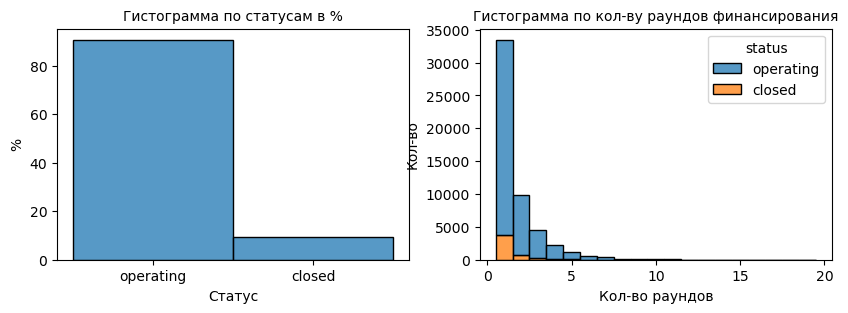

In [130]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.histplot(data=startups_regions, x='status', stat="percent")
plt.title('Гистограмма по статусам в %', fontsize= 10)
plt.ylabel('%')
plt.xlabel('Статус')
plt.subplot(1,2,2)
sns.histplot(data=startups_regions, x='funding_rounds', hue='status', discrete=True, multiple='stack')
plt.title('Гистограмма по кол-ву раундов финансирования', fontsize= 10)
plt.ylabel('Кол-во')
plt.xlabel('Кол-во раундов')
plt.show()

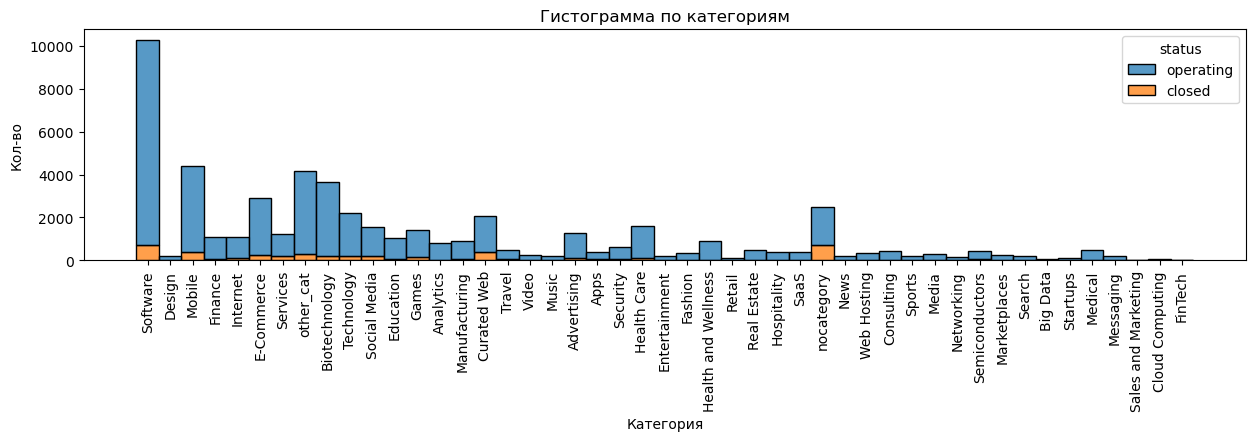

In [250]:
plt.figure(figsize=(15,3))
sns.histplot(data=startups_regions, x='new_cat', hue = 'status', discrete=True, multiple='stack')
plt.title('Гистограмма по категориям')
plt.xticks(rotation=90)
plt.ylabel('Кол-во')
plt.xlabel('Категория')
plt.show()

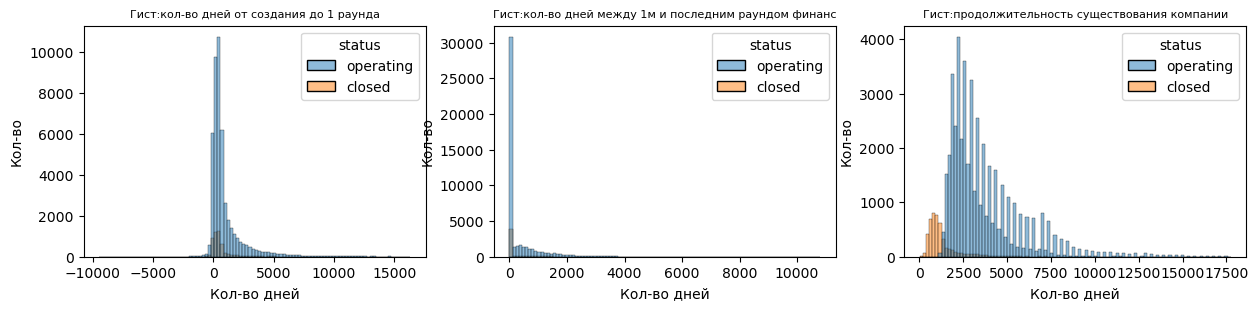

In [132]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
#data = startups_regions.sort_values(by='first_founded')[['first_founded','status']]
sns.histplot(data=startups_regions, x='first_founded', bins = 100, hue='status')
plt.title('Гист:кол-во дней от создания до 1 раунда', fontsize= 8)
plt.ylabel('Кол-во')
plt.xlabel('Кол-во дней')
plt.subplot(1,3,2)
#data = startups_regions.sort_values(by='last_first')[['last_first','status']]
sns.histplot(data=startups_regions, x='last_first', bins = 100, hue='status')
plt.title('Гист:кол-во дней между 1м и последним раундом финанс', fontsize= 8)
plt.ylabel('Кол-во')
plt.xlabel('Кол-во дней')
plt.subplot(1,3,3)
sns.histplot(data=startups_regions, x='lifetime', bins = 100, hue='status')
plt.title('Гист:продолжительность существования компании', fontsize= 8)
plt.ylabel('Кол-во')
plt.xlabel('Кол-во дней')
plt.show()

**Основные выводы по исследовательскому анализу данных**

1. Наблюдаются явные выбросы в показателе финансирования. Избавились от них.

2. Есть дисбаланс классов между действующими (ок.90%) и закрытыми стартапами. Это нужно будет учесть при обучении модели. Как правило, модель хорошо подстраивается под бОльший класс, поэтому для корректного определения меньшего класса потребуется доп.настройка.

3. Финансирование стартапов идет более активно в крупных хорошо развитых странах, но почти во всех есть небольшой процент закрытых стартапов.

4. В основном стартапы закрываются на небольшом сроке жизни.

5. Как правило, основное финансирование идет в первые раунды. Также основная масса закрывшихся стартапов идет в первые раунды финансирования.

6. Стартапы сильно разбросаны по разным категориям, но можно выделить наиболее часто встречающиеся: Software, Mobile, E-commerce, Tecnologies. Представленные стартапы в редко встречающихся категориях объединены в одну - other_cat, для удобства модели. Однако таких дынных оказалось довольно много, эта категория сопоставима по кол-ву стартапов с категорией Mobile. Почти во всех категорях встречается небольшой процент закрывшихся стартапов. Довольно много закрывшихся стартапов в данных, где были пропущены категории, им присвоена категория - nocategory.

## Корреляционный анализ

In [133]:
startups_regions['status_code'] = startups_regions['status'].apply(lambda x: 0 if x == 'operating' else 1)

Отберем столбцы, которые предположительно будут использованы в модели, исключая те столбцы, которые вызовут мультиколлинеарность.

In [231]:
startups_regions_matrix = startups_regions[['funding_total_usd','status_code','state_code', 'country_code', 'funding_rounds','funding_rounds_cat','lifetime','new_cat','first_founded','last_first']]

In [232]:
startups_regions_matrix.head()

,funding_total_usd,status_code,state_code,country_code,funding_rounds,funding_rounds_cat,lifetime,new_cat,first_founded,last_first
21239,"10,664,943,639.00",0,no_region,no_country,1,1,11322,Software,4383,0
4557,"8,207,450,000.00",0,CA,USA,13,5,3592,Design,153,2228
15975,"5,820,000,000.00",0,WA,USA,6,5,5570,Mobile,-659,4096
36631,"5,800,000,000.00",0,48,RUS,1,1,1925,Finance,287,0
29077,"5,162,513,431.00",0,CT,USA,2,2,9495,Internet,6168,1759


In [233]:
num_col_names = startups_regions_matrix.select_dtypes(include='number').columns.tolist()

In [234]:
startups_regions_matrix.phik_matrix(interval_cols=num_col_names)

,funding_total_usd,status_code,state_code,country_code,funding_rounds,funding_rounds_cat,lifetime,new_cat,first_founded,last_first
funding_total_usd,1.00,0.00,0.00,0.00,0.18,0.06,0.05,0.03,0.01,0.07
status_code,0.00,1.00,0.21,0.23,0.10,0.07,0.76,0.22,0.11,0.06
state_code,0.00,0.21,1.00,0.99,0.14,0.24,0.30,0.40,0.23,0.06
country_code,0.00,0.23,0.99,1.00,0.10,0.22,0.25,0.38,0.20,0.09
funding_rounds,0.18,0.10,0.14,0.10,1.00,0.95,0.24,0.20,0.06,0.49
funding_rounds_cat,0.06,0.07,0.24,0.22,0.95,1.00,0.29,0.28,0.08,0.54
lifetime,0.05,0.76,0.30,0.25,0.24,0.29,1.00,0.33,0.88,0.28
new_cat,0.03,0.22,0.40,0.38,0.20,0.28,0.33,1.00,0.20,0.21
first_founded,0.01,0.11,0.23,0.20,0.06,0.08,0.88,0.20,1.00,0.15
last_first,0.07,0.06,0.06,0.09,0.49,0.54,0.28,0.21,0.15,1.00


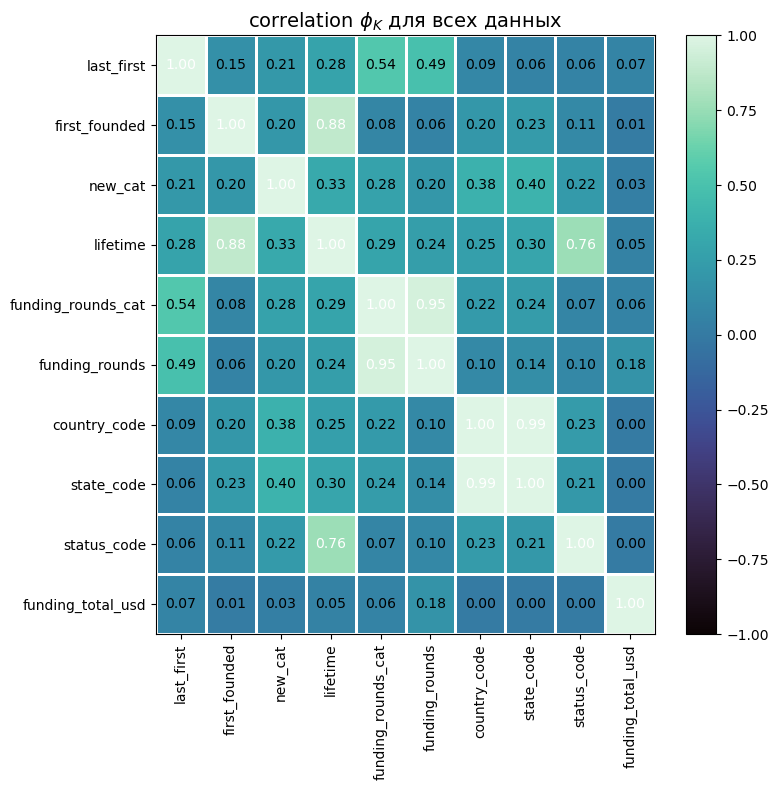

In [254]:
phik_overview = phik_matrix(startups_regions_matrix, interval_cols=num_col_names)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    color_map='mako',
    title=r'correlation $\phi_K$ для всех данных',
    figsize=(8, 8)
) 

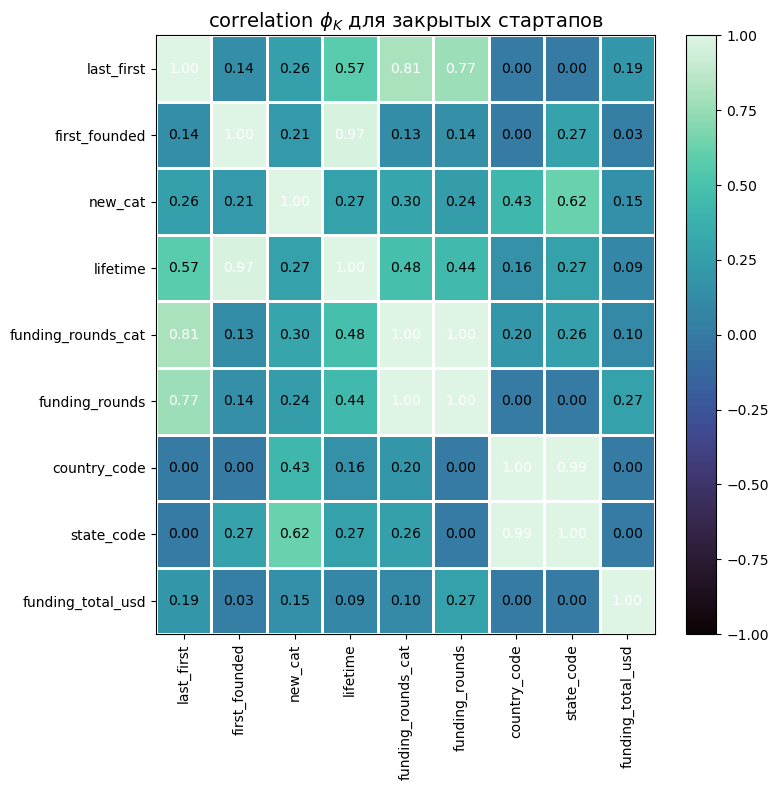

In [253]:
phik_overview = phik_matrix(startups_regions_matrix[startups_regions_matrix['status_code']==1], interval_cols=num_col_names)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    color_map='mako',
    title=r'correlation $\phi_K$ для закрытых стартапов',
    figsize=(8, 8)
) 

**Выводы по корреляционному анализу**

1. В первую очередь интересует признак status_code. Если смотреть на все данные целиком, наиболее сильная корреляция наблюдается с признаком lifetime - 0.76. Это подтверждает и исследовательский анализ данных. Есть незначительная связь с географическими признаками.

Однако на таблице корреляции только для закрытых стартапов видна явная связь с типом категории. На иссследовательском анализе данных было замечено. что было много закрытых стартапов, где категория была пропущена. Мы заменили ее на nocategory.

3. Видим сильную зависимость между country_code и state_code. Это говорит о мультиколлинеарности. Будем использовать в модели только один из них: country_code.

4. Также есть сильная зависимость между funding_rounds и funding_rounds_cat (созданный признак), поэтому funding_rounds_ca не будем его использовать для модели.

5. На таблице корреляции только для закрытых стартапов выделяются связи между раундами финансирования и разницей дат между первым и последним финансированием. Поскольку стартапы закрываются как правило в начале жизни, то и разница дат между первым и последним финансированием небольшая. Второй раунд случается для них нечасто.

## Обучение моделей

Для обучения моделей были отобраны следующие признаки:
funding_total_usd', 'country_code', 'funding_rounds', 'lifetime','new_cat','first_founded'.
Они должны исключать мультиколлинеарность.

В качестве модели выбрана логистическая регрессия, т.к. она хорошо подходит для определения бинарных категорий. Кроме того, учитывая дисбаланс классов, можно будет настроить порог для отнесения к той или другой категории.

В качестве эксперимента была также опробована модель kNN по поиску ближайших соседей. Но она показала хуже результат и отрабатывает гораздо дольше. Данные слишком рассредоточены.

In [192]:
X_train = startups_regions[['name','funding_total_usd', 'country_code', 'funding_rounds', 'lifetime','new_cat','first_founded']]

In [193]:
X_train = X_train.set_index('name')

In [194]:
X_train.head()

,funding_total_usd,country_code,funding_rounds,lifetime,new_cat,first_founded
name,,,,,,
Cambridge Technology Group,"10,664,943,639.00",no_country,1,11322,Software,4383
Uber,"8,207,450,000.00",USA,13,3592,Design,153
Clearwire,"5,820,000,000.00",USA,6,5570,Mobile,-659
Sberbank,"5,800,000,000.00",RUS,1,1925,Finance,287
Charter Communications,"5,162,513,431.00",USA,2,9495,Internet,6168


In [195]:
X_train.columns

Index(['funding_total_usd', 'country_code', 'funding_rounds', 'lifetime',
       'new_cat', 'first_founded'],
      dtype='object')

In [196]:
X_train.shape

(52513, 6)

In [197]:
y_train = startups_regions['status_code']

In [198]:
y_train.shape

(52513,)

In [199]:
startups_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                13125 non-null  object        
 1   category_list       13125 non-null  object        
 2   funding_total_usd   13125 non-null  float64       
 3   country_code        13125 non-null  object        
 4   state_code          13125 non-null  object        
 5   region              11536 non-null  object        
 6   city                11538 non-null  object        
 7   funding_rounds      13125 non-null  int64         
 8   founded_at          13125 non-null  datetime64[ns]
 9   first_funding_at    13125 non-null  datetime64[ns]
 10  last_funding_at     13125 non-null  datetime64[ns]
 11  lifetime            13125 non-null  int64         
 12  new_cat             13125 non-null  object        
 13  funding_rounds_cat  13125 non-null  int64     

In [200]:
X_test = startups_test[['name','funding_total_usd', 'country_code', 'funding_rounds', 'lifetime','new_cat','first_founded']]

In [201]:
X_test = X_test.set_index('name')

In [202]:
X_test.shape

(13125, 6)

Кодирование и масштабирование данных для использования в модели.

In [203]:
ohe_columns = [
    'new_cat',
    #'state_code',
    'country_code'
]
num_columns = ['funding_total_usd', 'funding_rounds', 'lifetime', 'first_founded']

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    #remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier)
])

In [204]:
X_train_p = pd.DataFrame(
    data_preprocessor.fit_transform(X_train),
    columns=data_preprocessor.get_feature_names_out()
)

In [205]:
X_test_p = pd.DataFrame(
    data_preprocessor.fit_transform(X_test),
    columns=data_preprocessor.get_feature_names_out()
)

In [206]:
param_grid = [
    {
        'models': [LogisticRegression(
            solver='liblinear'
            #penalty = ['l1','l2','elasticnet','none']
        )],
        'models__penalty':['l1','l2','elasticnet','none'],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='f1'
    #random_state=RANDOM_STATE,
    #n_jobs=-1
)
grid_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print ('Метрика лучшей модели по кросс валидации:', grid_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['new_cat', 'country_code']),
                                                 ('num', 'passthrough',
                                                  ['funding_total_usd',
                                                   'funding_rounds', 'lifeti

**Анализ признаков модели**

In [269]:
coefficients =grid_search.best_estimator_.named_steps['models'].coef_[0]

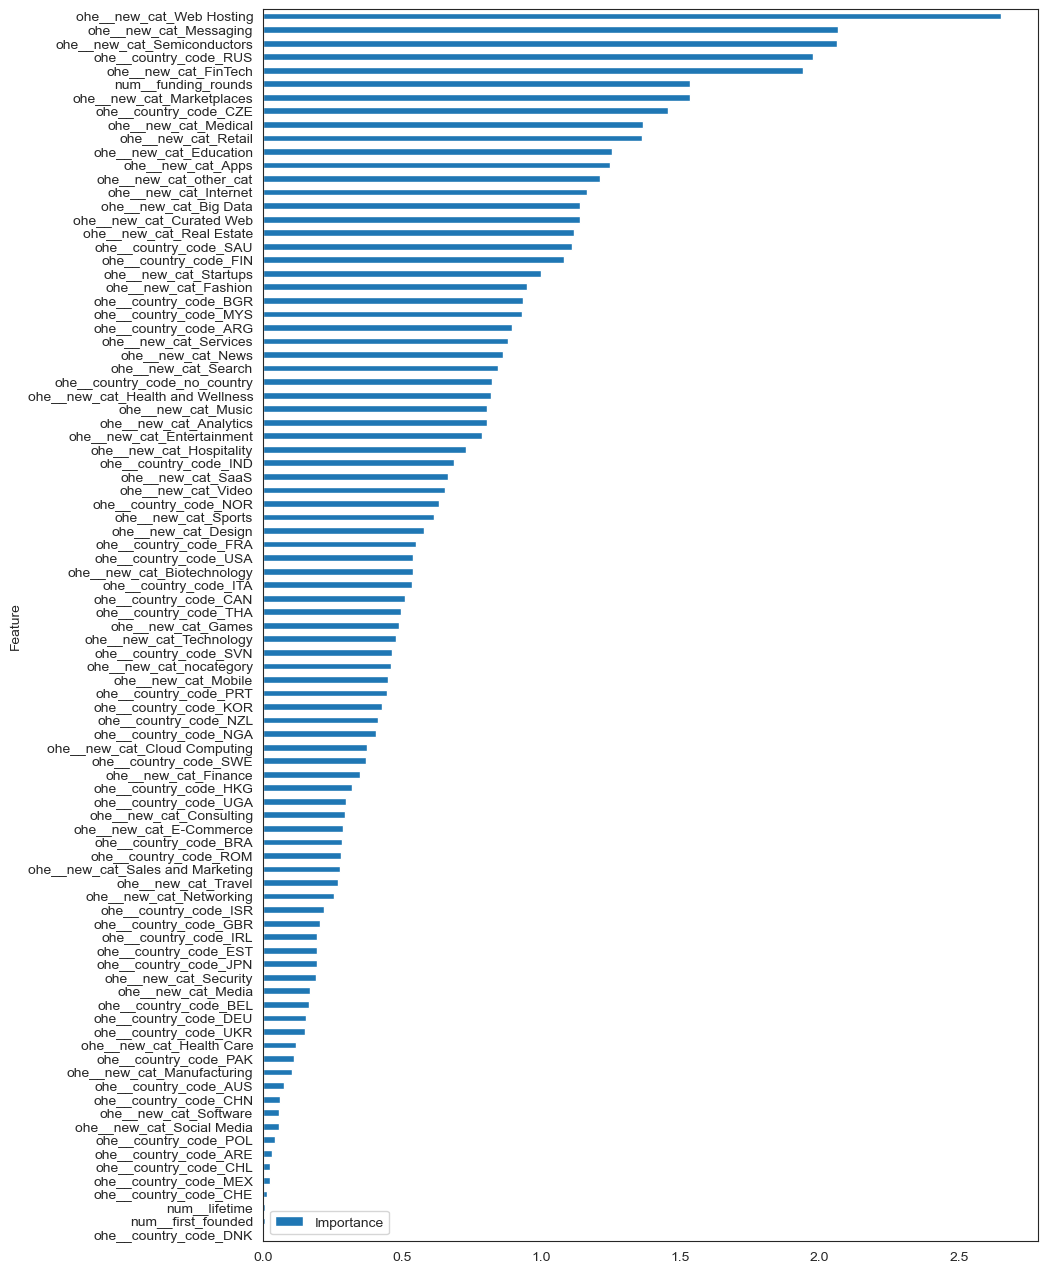

In [291]:
sns.set_style('white')
feature_importance = pd.DataFrame({'Feature': X_train_p.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance = feature_importance[feature_importance['Importance']>0.005]
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 16));

Среди наиболее важных признаков выделяются признаки по категориям и по странам. Значит, выделение категорий в отдельный признак оказалось полезным. Также важным признаком также оказалось кол-во раундов финансирования.
Lifetime находится не вверху списка самых важных.

**Подбор порога**

Подберем порог для класса Закрытых стартапов. Начинала с порога 0,55 - дошла до порога 0,75. Не стала дальше экспериментировать, т.к. открыто только 50% данных, есть риск перебрать со значением порога. 

In [207]:
predict_proba = grid_search.predict_proba(X_test)[:,1]

In [208]:
predict_proba

array([3.02190936e-08, 8.81387997e-07, 1.43025937e-01, ...,
       1.39863565e-07, 4.10626283e-01, 9.67749272e-08])

In [236]:
predicted_075 = []
for i in predict_proba:
    if i > 0.75:
        predicted_075.append(1)
    else:
        predicted_075.append(0)

In [237]:
result = X_test

In [238]:
result['status'] = predicted_075

In [239]:
result['status'].sum()

1330

In [240]:
result['status'] = result['status'].apply(lambda x: 'operating' if x == 0 else 'closed')

In [241]:
result_final = result['status'].reset_index()

In [242]:
result_final = result_final.set_index('name')

In [243]:
startups_csv_data = result_final.to_csv('D:/Practicum/Стартап Kaggle/startups_csv_data_075_17062024.csv', index = True)

**Выводы:**

В результате выполнения проекта определена модель для классификации стартапов на 2 категории: действующие и закрытые. Лучшая модель - это логистическая регрессия.

В тренировочной выборке наблюдался дисбаланс классов, поправку на который потом выполняла с помощью смещения порога.

Были созданы доп.признаки для более эффективной работы модели: новые категории стартапов, lifetime, а также были рассчитаны разницы между датами по некоторым показателям, т.к. они легче обрабатываются моделью.

По выполненному анализу признаков пришли к выводу, что создание новых признаков было полезным.

Признаки, вызывающие мультиколлинеарность, были исключены из модели, исходя из таблицы корреляции.

Как в тренировочной выборке, так и в тестовых данных было много пропусков. Таким образом, условия тренировочной выборки повторяли тестовую. Не стала удалять пропуски, а выбрала стратегию для их заполнения, которая была также применена к тестовым данным.
